# Rule based Sentiment Analysis
using TextBlob, VADER, SentiWordNet

### Data preprocessing steps
1. Cleaning the text
2. Tokenization
3. Enrichment - POS tagging
4. Stopwords removal
5. Obtaining the stem words

Importing dataset

In [1]:
import pandas as pd

# Creating a pandas dataframe from reviews.txt file
data = pd.read_csv('reviews.txt', sep='\t')
data.head()

,Unnamed: 0,review
0,0,I called because my food was cold and not done...
1,1,"OMG, hands down the best pizza I've had from D..."
2,2,This Domino's has the best pizza delivery and ...
3,3,My Sweetheart & I are very pleased with the qu...
4,4,"I called to place an order, The lady answered ..."


Dropping unwanted columns

In [2]:
# Dropping Unnamed: 0 column
mydata = data.drop('Unnamed: 0', axis=1)
mydata.head()

# mydata = pd.DataFrame(data.review)

,review
0,I called because my food was cold and not done...
1,"OMG, hands down the best pizza I've had from D..."
2,This Domino's has the best pizza delivery and ...
3,My Sweetheart & I are very pleased with the qu...
4,"I called to place an order, The lady answered ..."


### Step 1: Cleaning the text

In [3]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['review'].apply(clean)
mydata.head()

,review,Cleaned Reviews
0,I called because my food was cold and not done...,I called because my food was cold and not done...
1,"OMG, hands down the best pizza I've had from D...",OMG hands down the best pizza I ve had from Do...
2,This Domino's has the best pizza delivery and ...,This Domino s has the best pizza delivery and ...
3,My Sweetheart & I are very pleased with the qu...,My Sweetheart I are very pleased with the qual...
4,"I called to place an order, The lady answered ...",I called to place an order The lady answered a...


### Steps 2-4: Tokenization, POS tagging, stopwords removal

In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['Cleaned Reviews'].apply(token_stop_pos)
mydata.head()
# mydata['POS tagged'][0]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,Cleaned Reviews,POS tagged
0,I called because my food was cold and not done...,I called because my food was cold and not done...,"[(called, v), (food, n), (cold, a), (done, v),..."
1,"OMG, hands down the best pizza I've had from D...",OMG hands down the best pizza I ve had from Do...,"[(OMG, n), (hands, v), (best, a), (pizza, n), ..."
2,This Domino's has the best pizza delivery and ...,This Domino s has the best pizza delivery and ...,"[(Domino, n), (best, a), (pizza, n), (delivery..."
3,My Sweetheart & I are very pleased with the qu...,My Sweetheart I are very pleased with the qual...,"[(Sweetheart, n), (pleased, a), (quality, n), ..."
4,"I called to place an order, The lady answered ...",I called to place an order The lady answered a...,"[(called, v), (place, v), (order, n), (lady, n..."


### Step 5: Obtaining the stem words

#### Lemmatization

In [5]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()
# print(mydata['review'][239] + "\n" + mydata['Lemma'][239])

,review,Cleaned Reviews,POS tagged,Lemma
0,I called because my food was cold and not done...,I called because my food was cold and not done...,"[(called, v), (food, n), (cold, a), (done, v),...",call food cold do right miss item call answe...
1,"OMG, hands down the best pizza I've had from D...",OMG hands down the best pizza I ve had from Do...,"[(OMG, n), (hands, v), (best, a), (pizza, n), ...",OMG hand best pizza Domino pizza Southaven M...
2,This Domino's has the best pizza delivery and ...,This Domino s has the best pizza delivery and ...,"[(Domino, n), (best, a), (pizza, n), (delivery...",Domino best pizza delivery customer service ...
3,My Sweetheart & I are very pleased with the qu...,My Sweetheart I are very pleased with the qual...,"[(Sweetheart, n), (pleased, a), (quality, n), ...",Sweetheart pleased quality service excellent...
4,"I called to place an order, The lady answered ...",I called to place an order The lady answered a...,"[(called, v), (place, v), (order, n), (lady, n...",call place order lady answer already know na...


In [6]:
mydata[['review', 'Lemma']]

,review,Lemma
0,I called because my food was cold and not done...,call food cold do right miss item call answe...
1,"OMG, hands down the best pizza I've had from D...",OMG hand best pizza Domino pizza Southaven M...
2,This Domino's has the best pizza delivery and ...,Domino best pizza delivery customer service ...
3,My Sweetheart & I are very pleased with the qu...,Sweetheart pleased quality service excellent...
4,"I called to place an order, The lady answered ...",call place order lady answer already know na...
...,...,...
235,Good quality and cheap pizzas. They offer wide...,Good quality cheap pizza offer wide range pi...
236,Every time I order online they forget to put m...,Every time order online forget put olive ord...
237,"Store: SHOP NO. 17 & 18, A WING, HALLMARK, VAS...",Store SHOP WING HALLMARK VASANT OSCAR LBS MA...
238,"Chicken topping was so good, I could not sit s...",Chicken topping good could sit still excelle...


# Sentiment analysis using TextBlob

In [7]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [8]:
fin_data = pd.DataFrame(mydata[['review', 'Lemma']])

In [9]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,review,Lemma,Polarity,Analysis
0,I called because my food was cold and not done...,call food cold do right miss item call answe...,0.217143,Positive
1,"OMG, hands down the best pizza I've had from D...",OMG hand best pizza Domino pizza Southaven M...,0.538889,Positive
2,This Domino's has the best pizza delivery and ...,Domino best pizza delivery customer service ...,0.355000,Positive
3,My Sweetheart & I are very pleased with the qu...,Sweetheart pleased quality service excellent...,0.238542,Positive
4,"I called to place an order, The lady answered ...",call place order lady answer already know na...,0.650000,Positive


In [26]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Negative    119
Positive    114
Neutral       7
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x183c71c6388>,
 [Text(0.014398541397730972, 1.099905760511153, 'Negative'),
  Text(-0.11498130276606976, -1.093974085622789, 'Positive'),
  Text(1.3443366507319228, -0.12352720145327041, 'Neutral')],
 [Text(0.007853749853307801, 0.599948596642447, '49.6%'),
  Text(-0.06271707423603803, -0.5967131376124304, '47.5%'),
  Text(0.8464341874978771, -0.07777638610020729, '2.9%')])

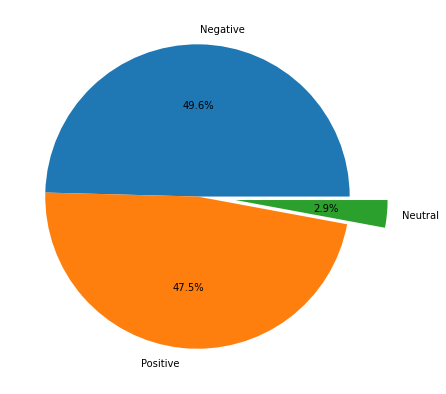

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
# plt.legend()

# Sentiment analysis using VADER

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [19]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,review,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,I called because my food was cold and not done...,call food cold do right miss item call answe...,0.217143,Positive,0.7579,Positive,Positive
1,"OMG, hands down the best pizza I've had from D...",OMG hand best pizza Domino pizza Southaven M...,0.538889,Positive,0.9312,Positive,Positive
2,This Domino's has the best pizza delivery and ...,Domino best pizza delivery customer service ...,0.355000,Positive,0.9552,Positive,Positive
3,My Sweetheart & I are very pleased with the qu...,Sweetheart pleased quality service excellent...,0.238542,Positive,0.9716,Positive,Positive
4,"I called to place an order, The lady answered ...",call place order lady answer already know na...,0.650000,Positive,0.8091,Positive,Positive


In [20]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Neutral     93
Positive    82
Negative    65
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x183bcef8d88>,
 [Text(0.41534051065610117, 1.1258295875521878, 'Neutral'),
  Text(-1.0269384962128683, -0.3942046739906225, 'Positive'),
  Text(0.7252803707995565, -0.8270238108620924, 'Negative')],
 [Text(0.24228196454939235, 0.6567339260721095, '38.7%'),
  Text(-0.5601482706615645, -0.21502073126761223, '34.2%'),
  Text(0.3956074749815762, -0.45110389683386853, '27.1%')])

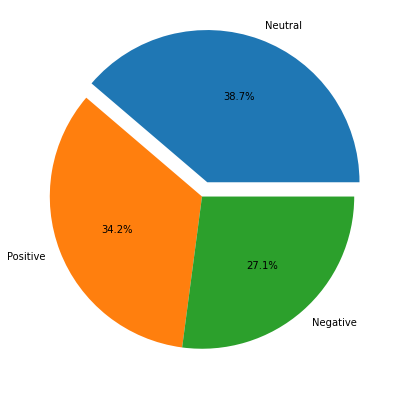

In [21]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

# Sentiment Analysis using SentiWordNet

In [22]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = mydata['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\harika\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,review,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,I called because my food was cold and not done...,call food cold do right miss item call answe...,0.217143,Positive,0.7579,Positive,Positive
1,"OMG, hands down the best pizza I've had from D...",OMG hand best pizza Domino pizza Southaven M...,0.538889,Positive,0.9312,Positive,Positive
2,This Domino's has the best pizza delivery and ...,Domino best pizza delivery customer service ...,0.355000,Positive,0.9552,Positive,Positive
3,My Sweetheart & I are very pleased with the qu...,Sweetheart pleased quality service excellent...,0.238542,Positive,0.9716,Positive,Positive
4,"I called to place an order, The lady answered ...",call place order lady answer already know na...,0.650000,Positive,0.8091,Positive,Positive


In [23]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Negative    135
Positive    100
Neutral       5
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x183bcf21508>,
 [Text(-0.23410838641935386, 1.1769423364838767, 'Negative'),
  Text(0.14357877740594172, -1.0905893519921306, 'Positive'),
  Text(1.0976448112122377, -0.0719435085247544, 'Neutral')],
 [Text(-0.13656322541128973, 0.6865496962822613, '56.2%'),
  Text(0.07831569676687729, -0.5948669192684347, '41.7%'),
  Text(0.5987153515703113, -0.039241913740775125, '2.1%')])

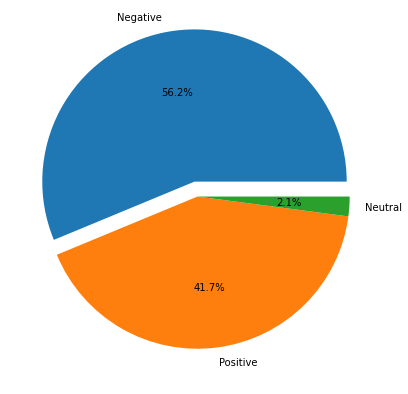

In [24]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

# Visual representation of TextBlob, VADER, SentiWordNet results

([<matplotlib.patches.Wedge at 0x183c7a19948>,
 [Text(-0.21459935421774104, 1.0788638084435536, 'Negative'),
  Text(0.14357877740594172, -1.0905893519921306, 'Positive'),
  Text(1.3471095410332008, -0.08829430591674403, 'Neutral')],
 [Text(-0.11705419320967692, 0.5884711682419382, '56.2%'),
  Text(0.07831569676687729, -0.5948669192684347, '41.7%'),
  Text(0.8481800813912743, -0.05559271113276476, '2.1%')])

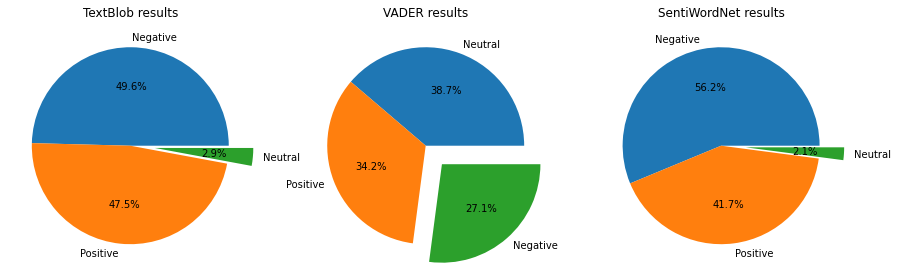

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)